# Pythorch: Regression and Classification

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch import nn, optim
from torch.utils.data import DataLoader, TensorDataset
from tqdm import tqdm

In [2]:
# Load data
x = np.loadtxt('x_reg.txt')
y = np.loadtxt('y_reg.txt')

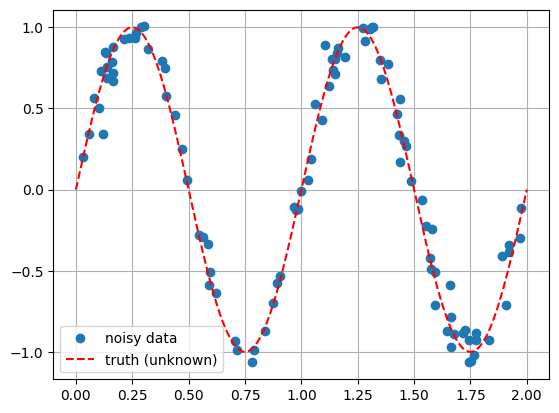

In [3]:
# Visualize the data
plt.plot(x, y, 'o', label='noisy data')
linsp = np.linspace(0,2,1000)
plt.plot(linsp, np.sin(2*np.pi* linsp), '--r', label='truth (unknown)')
plt.legend()
plt.grid()

In [4]:
y_t = torch.tensor(y.T).float().reshape(-1, 1)
x_t = torch.tensor(x.T).float().reshape(-1, 1)

In [15]:
batch_size = x.shape[0]

train_set = DataLoader(TensorDataset(x_t,y_t), batch_size=batch_size) #do not forget y is the input, x is the output


In [16]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.inputLayer = nn.Linear(1, 8)
        self.relu1 = nn.ReLU()
        self.hiddenFirst = nn.Linear(8, 8)
        self.relu2 = nn.ReLU()
        self.hiddenSecond = nn.Linear(8, 8)
        self.relu3 = nn.ReLU()
        self.outputLayer = nn.Linear(8, 1)

    def forward(self, y):
        layer1 = self.relu1(self.inputLayer(y))
        layer2 = self.relu2(self.hiddenFirst(layer1))
        layer3 = self.relu3(self.hiddenSecond(layer2))
        outLayer = self.outputLayer(layer3)
        return outLayer

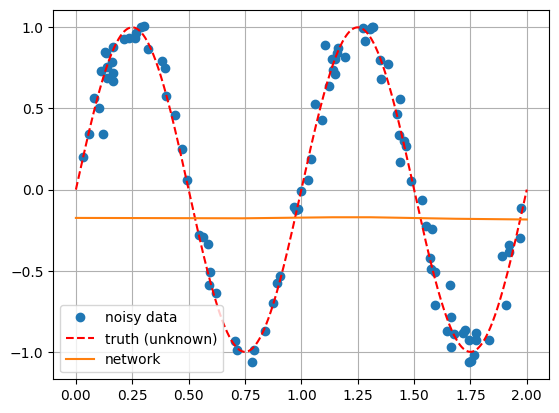

In [17]:
# initialize the network
net = Net()
# plot the network output before training
linspace_t = torch.tensor(linsp.reshape(-1,1)).float()
y_hat = net(linspace_t).detach().numpy()
plt.plot(x, y, 'o', label='noisy data')
plt.plot(linsp, np.sin(2*np.pi* linsp), '--r', label='truth (unknown)')
plt.plot(linsp, y_hat, label='network')
plt.legend()
plt.grid()

In [18]:
def train(NeuralNetwork,train_set, loss_function, num_epochs, lr=0.001):
    """
    Performs gradient descent learning.
    
    NeuralNetwork = neural network to be trained
    dataloader = DataLoader that deals batches for mini-batch learning
    loss_function = cost function to be optimized
    num_epochs = number of training epochs
    lr = learning rate (default value 0.001)
    """
    # optimizer
    optimizer = optim.SGD(NeuralNetwork.parameters(), lr=lr)
    for epoch in tqdm(range(num_epochs), desc="Training"):
        for inputs,labels in train_set:
            # forward propagation
            outputs = NeuralNetwork(inputs)
            # compute loss
            loss = loss_function(outputs, labels)
            # reset gradient
            optimizer.zero_grad()
            # backprop
            loss.backward()
            # update parameters
            optimizer.step()

        if (epoch % 1000) == 0:
            print('Epoch: ',epoch, 'Loss: ', loss.detach().numpy())
    

In [19]:
torch.manual_seed(5)
net = Net()
train(net, train_set, nn.MSELoss(), 10000, 0.1)

Training:   1%|          | 51/10000 [00:00<00:19, 503.35it/s]

Epoch:  0 Loss:  0.49278763


Training:  11%|█         | 1102/10000 [00:01<00:13, 651.08it/s]

Epoch:  1000 Loss:  0.03176808


Training:  21%|██        | 2102/10000 [00:03<00:11, 664.64it/s]

Epoch:  2000 Loss:  0.044876456


Training:  31%|███       | 3123/10000 [00:05<00:11, 620.36it/s]

Epoch:  3000 Loss:  0.03611297


Training:  41%|████      | 4098/10000 [00:06<00:09, 620.23it/s]

Epoch:  4000 Loss:  0.01284145


Training:  51%|█████     | 5120/10000 [00:08<00:07, 656.14it/s]

Epoch:  5000 Loss:  0.012934654


Training:  61%|██████▏   | 6128/10000 [00:10<00:06, 641.77it/s]

Epoch:  6000 Loss:  0.012191702


Training:  71%|███████   | 7091/10000 [00:11<00:04, 628.81it/s]

Epoch:  7000 Loss:  0.012256061


Training:  81%|████████  | 8097/10000 [00:13<00:03, 624.30it/s]

Epoch:  8000 Loss:  0.012359577


Training:  91%|█████████ | 9079/10000 [00:15<00:01, 483.56it/s]

Epoch:  9000 Loss:  0.010984277


Training: 100%|██████████| 10000/10000 [00:16<00:00, 594.36it/s]


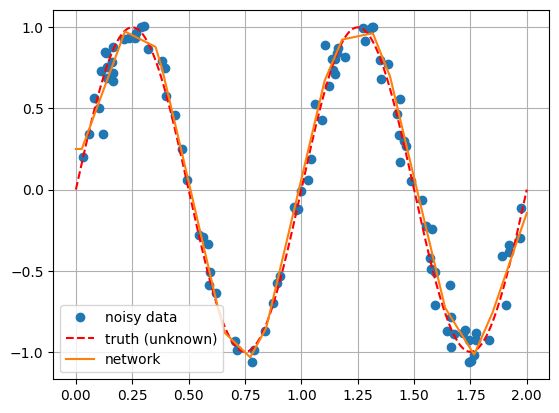

In [20]:
# visualization
y_hat = net(torch.tensor(linsp.reshape(-1,1)).float()).detach().numpy()
plt.plot(x, y, 'o', label='noisy data')
plt.plot(linsp, np.sin(2*np.pi* linsp), '--r', label='truth (unknown)')
plt.plot(linsp, y_hat, label='network')
plt.legend()
plt.grid()

### 2) Classification

In [21]:
# load data
x = np.loadtxt('x_class.txt')
y = np.loadtxt('y_class.txt')

x is a two-dimensional numpy array, while y is a one dimensional array containing only zeros and ones, i.e. the labels assign each x value to one of two classes.

In [22]:
# Check the shape
print(x.shape)
print(y.shape)

(2, 80)
(80,)


In [23]:
x = torch.from_numpy(x.T).float()
y = torch.from_numpy(y).float().reshape(-1,1)

Make a scatter plot of your x values and use two different colours for the values labelled with 0 and the ones labelled with 1.

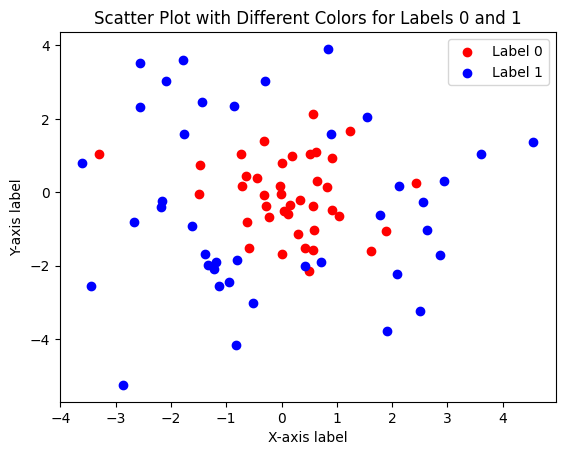

In [24]:
labels_0 = x[y[:, 0] == 0]
labels_1 = x[y[:, 0] == 1]

plt.scatter(labels_0[:, 0], labels_0[:, 1], c='red', label='Label 0')
plt.scatter(labels_1[:, 0], labels_1[:, 1], c='blue', label='Label 1')

plt.xlabel('X-axis label')
plt.ylabel('Y-axis label')
plt.title('Scatter Plot with Different Colors for Labels 0 and 1')
plt.legend()
plt.show()

In [25]:

batch_size = 30
dataloader_LogReg = DataLoader(TensorDataset(x,y), batch_size=batch_size)

In [26]:
class Net_LogReg(nn.Module):
    """
    Neural Network with inputs:
    layer_sizes = tuple specifying the number of neurons in each layer
    act_hid = activation function at the hidden layers
    act_out = activation function at the output
    """
    # initialize the network and define all learnable parameters
    def __init__(self, layer_sizes, act_hid, act_out): #, act_hid, act_out):
        super(Net_LogReg, self).__init__()
        self.L = len(layer_sizes)
        self.layers = nn.ModuleList() # initialize empty module list
        self.act_hid = act_hid
        self.act_out = act_out
        for k in range(len(layer_sizes) - 1):
            self.layers.append(nn.Linear(layer_sizes[k], layer_sizes[k+1]))

    # define the forward pass
    def forward(self, x):
        for k in range(self.L - 2):
            x = self.act_hid(self.layers[k](x))
        x = self.act_out(self.layers[self.L - 2](x))
        return x

In [27]:
# Initialize the model
torch.manual_seed(1)
net = Net_LogReg((2,10,10,1), nn.ReLU(), torch.sigmoid)  

In [28]:
# training
train(net, dataloader_LogReg,nn.BCELoss(),10000, 0.003)

Training:   0%|          | 40/10000 [00:00<00:50, 198.07it/s]

Epoch:  0 Loss:  0.6960558


Training:  11%|█         | 1065/10000 [00:03<00:24, 358.42it/s]

Epoch:  1000 Loss:  0.4720264


Training:  20%|██        | 2032/10000 [00:06<00:32, 247.59it/s]

Epoch:  2000 Loss:  0.36488134


Training:  30%|███       | 3040/10000 [00:10<00:25, 276.14it/s]

Epoch:  3000 Loss:  0.30763006


Training:  40%|████      | 4037/10000 [00:13<00:21, 277.64it/s]

Epoch:  4000 Loss:  0.2772801


Training:  51%|█████     | 5057/10000 [00:17<00:14, 330.92it/s]

Epoch:  5000 Loss:  0.26038378


Training:  60%|██████    | 6045/10000 [00:20<00:13, 297.74it/s]

Epoch:  6000 Loss:  0.24766481


Training:  70%|███████   | 7043/10000 [00:23<00:09, 311.57it/s]

Epoch:  7000 Loss:  0.2394253


Training:  81%|████████  | 8052/10000 [00:27<00:07, 278.16it/s]

Epoch:  8000 Loss:  0.23222725


Training:  90%|█████████ | 9038/10000 [00:32<00:04, 206.37it/s]

Epoch:  9000 Loss:  0.22597894


Training: 100%|██████████| 10000/10000 [00:36<00:00, 274.56it/s]


In [35]:
def plot_decision_boundary_torch(x, y, net):
    h = 0.05
    x0_min, x0_max = x[:,0].min() - 1, x[:,0].max() + 1
    x1_min, x1_max = x[:,1].min() - 1, x[:,1].max() + 1
    x0_grid, x1_grid = np.meshgrid(np.arange(x0_min, x0_max, h), np.arange(x1_min, x1_max, h))                   
    xx = torch.tensor(np.hstack([x0_grid.reshape((-1,1)),x1_grid.reshape((-1,1))])).float()   
    a = net(xx).detach().numpy().reshape(x0_grid.shape)
    plt.contour(x0_grid, x1_grid, a, [0.5], colors=('k',))      

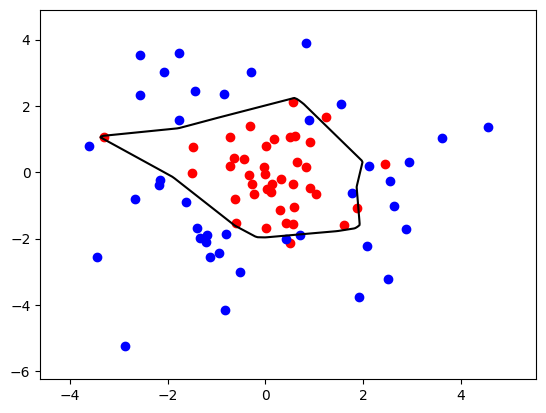

In [36]:
# Plot
plot_decision_boundary_torch(x, y, net)

labels_0 = x[y[:, 0] == 0]
labels_1 = x[y[:, 0] == 1]

plt.scatter(labels_0[:, 0], labels_0[:, 1], c='red', label='Label 0')
plt.scatter(labels_1[:, 0], labels_1[:, 1], c='blue', label='Label 1')